In [9]:
from PyPurityTools import PyPurityTools as ppt
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import savgol_filter
import matplotlib.style
import matplotlib as mpl
import math
import scipy.fftpack
from scipy.signal import butter,filtfilt

#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

In [10]:
#cathodeList,timeList=ppt.getScopeWaveforms("/Users/rjn/dune/purity/UCL/TestFilters/Pulser_Arb_50mV_200kHz/NoFilter.ch3.traces",True)
#anodeAList,timeList=ppt.getScopeWaveforms("/Users/rjn/dune/purity/UCL/stefano/2020feb20/preamp_calibration/cathode_preampA_anode_preampK_5.10.20Vcm_gold.ch3.traces",True)
#anodeKList,timeList=ppt.getScopeWaveforms("/Users/rjn/dune/purity/UCL/stefano/2020feb20/preamp_calibration/cathode_preampK_anode_preampA_5.10.20Vcm_gold.ch3.traces",True)
anodeKList,timeList=ppt.getScopeWaveforms("/Users/rjn/dune/purity/UCL/abf/gas_26.02.2020/calibration/cathode_preampA_anode_preampK_60.120.240Vcm_gold.ch3.traces",True)
anodeAList,timeList=ppt.getScopeWaveforms("/Users/rjn/dune/purity/UCL/abf/gas_26.02.2020/calibration/cathode_preampK_anode_preampA_60.120.240Vcm_gold.ch3.traces",True)
cathodeAList,timeList=ppt.getScopeWaveforms("/Users/rjn/dune/purity/UCL/abf/gas_26.02.2020/calibration/cathode_preampA_anode_preampK_60.120.240Vcm_gold.ch4.traces",True)
cathodeKList,timeList=ppt.getScopeWaveforms("/Users/rjn/dune/purity/UCL/abf/gas_26.02.2020/calibration/cathode_preampK_anode_preampA_60.120.240Vcm_gold.ch4.traces",True)

In [11]:
dt=timeList[1]-timeList[0]
fs=1./dt
lowAnA=ppt.butter_lowpass_filter(anodeAList[0],0.5,fs,2)
lowAnK=ppt.butter_lowpass_filter(anodeKList[0],0.5,fs,2)
lowCatA=ppt.butter_lowpass_filter(cathodeAList[0],0.5,fs,2)
lowCatK=ppt.butter_lowpass_filter(cathodeKList[0],0.5,fs,2)



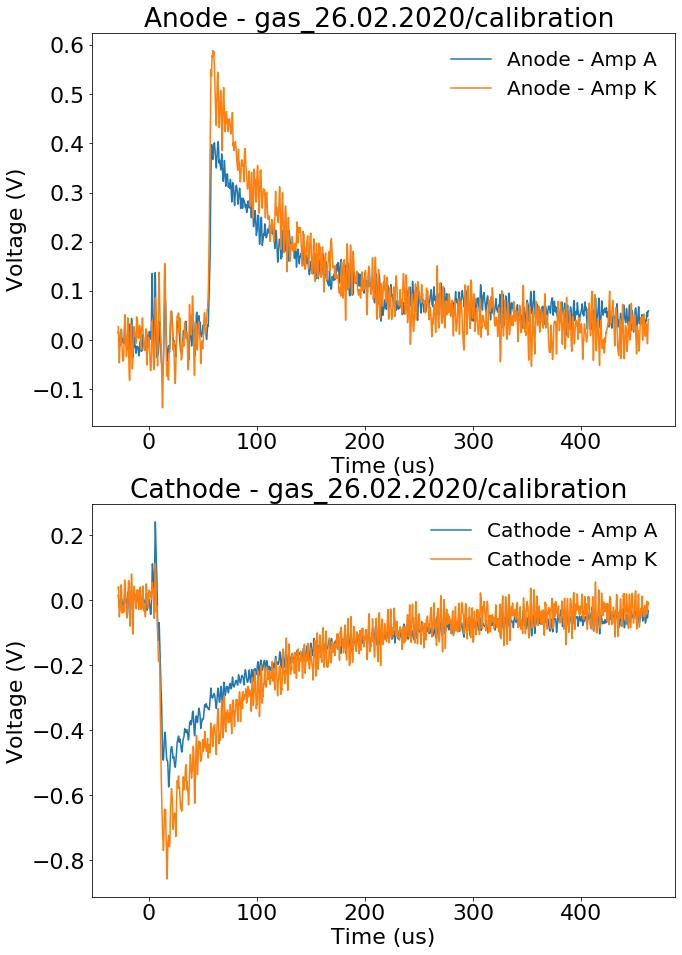

In [12]:
from scipy.optimize import curve_fit


fig, ax = plt.subplots(2,1)
ax[0].plot(timeList[2000:],lowAnA[2000:],label="Anode - Amp A")
ax[0].plot(timeList[2000:],lowAnK[2000:],label="Anode - Amp K")
ax[0].set_xlabel('Time (us)')
ax[0].set_ylabel('Voltage (V)')
ax[0].set_title('Anode - gas_26.02.2020/calibration ')
ax[0].legend(fontsize=20,loc='upper right')
ax[1].plot(timeList[2000:],lowCatA[2000:],label="Cathode - Amp A")
ax[1].plot(timeList[2000:],lowCatK[2000:],label="Cathode - Amp K")
ax[1].set_xlabel('Time (us)')
ax[1].set_ylabel('Voltage (V)')
ax[1].set_title('Cathode - gas_26.02.2020/calibration ')
ax[1].legend(fontsize=20,loc='upper right')
plt.subplots_adjust(bottom=0.1, right=0.8, top=1.6)

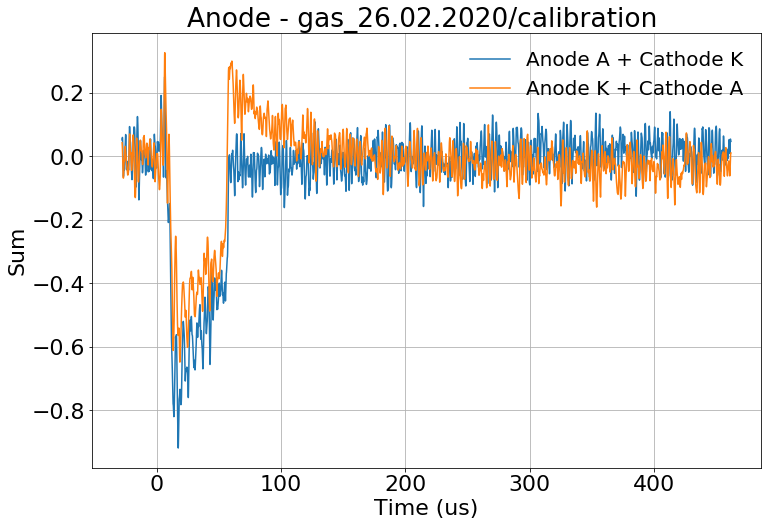

In [13]:
fig, ax = plt.subplots()
ax.plot(timeList[2000:],(lowAnA+lowCatK)[2000:],label="Anode A + Cathode K")
ax.plot(timeList[2000:],(lowAnK+lowCatA)[2000:],label="Anode K + Cathode A")
ax.set_xlabel('Time (us)')
ax.set_ylabel('Sum')
ax.set_title('Anode - gas_26.02.2020/calibration ')
#ax.set_ylim([0,2.0])
ax.legend(fontsize=20,loc='upper right')
ax.grid(True)

In [14]:
def funcJustExp(x,Q,fallTime):
    return Q*np.exp((-x)/fallTime)

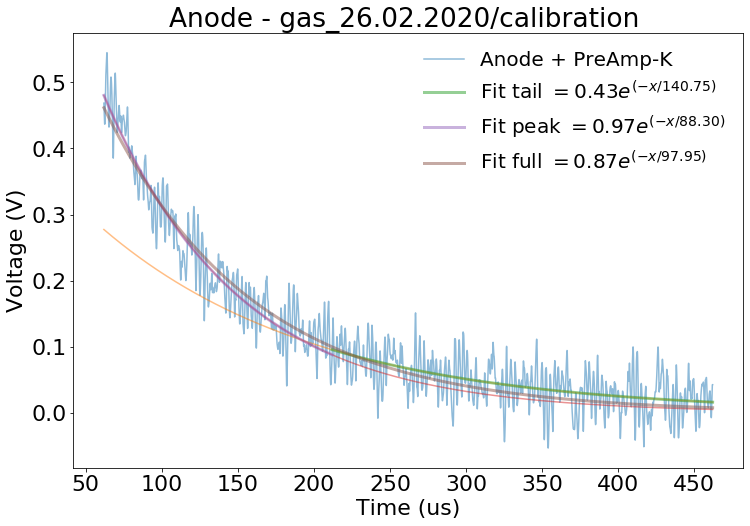

In [15]:
anodeStart=20000
fitBound=50000

popt, pcov = curve_fit(funcJustExp, timeList[fitBound:],lowAnK[fitBound:],bounds=([0,0], [1000,1000]))
popt2, pcov2 = curve_fit(funcJustExp, timeList[anodeStart:fitBound],lowAnK[anodeStart:fitBound],bounds=([0,0], [1000,1000]))
popt3, pcov3 = curve_fit(funcJustExp, timeList[anodeStart:],lowAnK[anodeStart:],bounds=([0,0], [1000,1000]))

tailLabel=r"Fit tail $= "+"{:.2f}".format(popt[0])+"e^{(-x/"+"{:.2f}".format(popt[1])+")}$"
peakLabel=r"Fit peak $= "+"{:.2f}".format(popt2[0])+"e^{(-x/"+"{:.2f}".format(popt2[1])+")}$"
fullLabel=r"Fit full $= "+"{:.2f}".format(popt3[0])+"e^{(-x/"+"{:.2f}".format(popt3[1])+")}$"
fig, ax = plt.subplots()
funcList=funcJustExp(timeList,*popt)
funcList2=funcJustExp(timeList,*popt2)
funcList3=funcJustExp(timeList,*popt3)
ax.plot(timeList[anodeStart:],lowAnK[anodeStart:],label="Anode + PreAmp-K",alpha=0.5)
ax.plot(timeList[anodeStart:],funcList[anodeStart:],alpha=0.5)
ax.plot(timeList[fitBound:],funcList[fitBound:],label=tailLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[anodeStart:],funcList2[anodeStart:],alpha=0.5)
ax.plot(timeList[anodeStart:fitBound],funcList2[anodeStart:fitBound],label=peakLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[anodeStart:],funcList3[anodeStart:],label=fullLabel,alpha=0.5,lineWidth=3)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Voltage (V)')
ax.set_title('Anode - gas_26.02.2020/calibration ')
ax.legend(fontsize=20,loc='upper right')

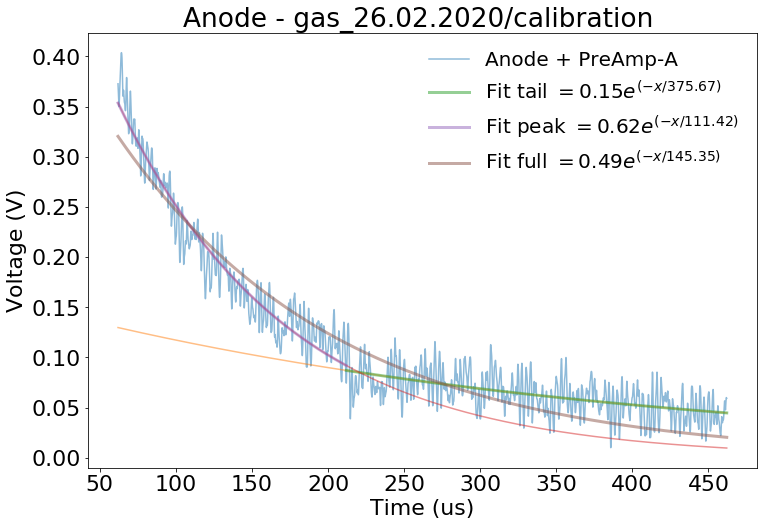

In [16]:
anodeStart=20000
fitBound=50000

popt, pcov = curve_fit(funcJustExp, timeList[fitBound:],lowAnA[fitBound:],bounds=([0,0], [1000,1000]))
popt2, pcov2 = curve_fit(funcJustExp, timeList[anodeStart:fitBound],lowAnA[anodeStart:fitBound],bounds=([0,0], [1000,1000]))
popt3, pcov3 = curve_fit(funcJustExp, timeList[anodeStart:],lowAnA[anodeStart:],bounds=([0,0], [1000,1000]))

tailLabel=r"Fit tail $= "+"{:.2f}".format(popt[0])+"e^{(-x/"+"{:.2f}".format(popt[1])+")}$"
peakLabel=r"Fit peak $= "+"{:.2f}".format(popt2[0])+"e^{(-x/"+"{:.2f}".format(popt2[1])+")}$"
fullLabel=r"Fit full $= "+"{:.2f}".format(popt3[0])+"e^{(-x/"+"{:.2f}".format(popt3[1])+")}$"
fig, ax = plt.subplots()
funcList=funcJustExp(timeList,*popt)
funcList2=funcJustExp(timeList,*popt2)
funcList3=funcJustExp(timeList,*popt3)
ax.plot(timeList[anodeStart:],lowAnA[anodeStart:],label="Anode + PreAmp-A",alpha=0.5)
ax.plot(timeList[anodeStart:],funcList[anodeStart:],alpha=0.5)
ax.plot(timeList[fitBound:],funcList[fitBound:],label=tailLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[anodeStart:],funcList2[anodeStart:],alpha=0.5)
ax.plot(timeList[anodeStart:fitBound],funcList2[anodeStart:fitBound],label=peakLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[anodeStart:],funcList3[anodeStart:],label=fullLabel,alpha=0.5,lineWidth=3)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Voltage (V)')
ax.set_title('Anode - gas_26.02.2020/calibration ')
ax.legend(fontsize=20,loc='upper right')

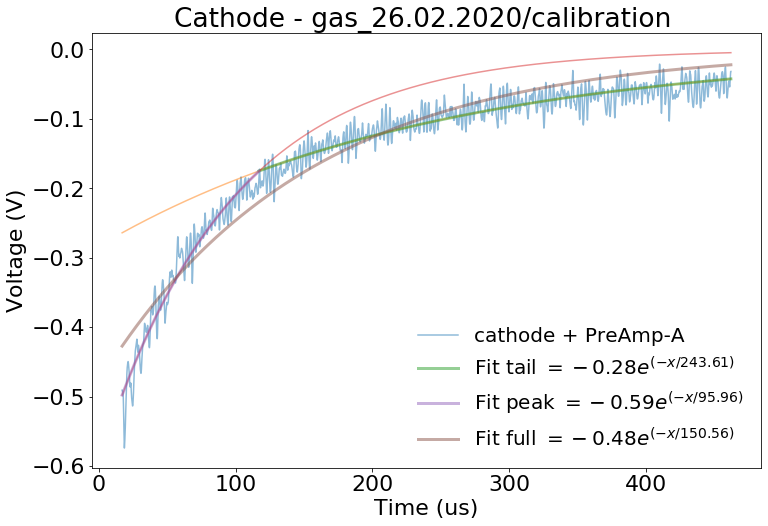

In [17]:
cathodeStart=11000
fitBound=31000

popt, pcov = curve_fit(funcJustExp, timeList[fitBound:],lowCatA[fitBound:],bounds=([-1000,0], [1000,1000]))
popt2, pcov2 = curve_fit(funcJustExp, timeList[cathodeStart:fitBound],lowCatA[cathodeStart:fitBound],bounds=([-1000,0], [1000,1000]))
popt3, pcov3 = curve_fit(funcJustExp, timeList[cathodeStart:],lowCatA[cathodeStart:],bounds=([-1000,0], [1000,1000]))



fig, ax = plt.subplots()
funcList=funcJustExp(timeList,*popt)
funcList2=funcJustExp(timeList,*popt2)
funcList3=funcJustExp(timeList,*popt3)

tailLabel=r"Fit tail $= "+"{:.2f}".format(popt[0])+"e^{(-x/"+"{:.2f}".format(popt[1])+")}$"
peakLabel=r"Fit peak $= "+"{:.2f}".format(popt2[0])+"e^{(-x/"+"{:.2f}".format(popt2[1])+")}$"
fullLabel=r"Fit full $= "+"{:.2f}".format(popt3[0])+"e^{(-x/"+"{:.2f}".format(popt3[1])+")}$"


ax.plot(timeList[cathodeStart:],lowCatA[cathodeStart:],label="cathode + PreAmp-A",alpha=0.5)
ax.plot(timeList[cathodeStart:],funcList[cathodeStart:],alpha=0.5)
ax.plot(timeList[fitBound:],funcList[fitBound:],label=tailLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[cathodeStart:],funcList2[cathodeStart:],alpha=0.5)
ax.plot(timeList[cathodeStart:fitBound],funcList2[cathodeStart:fitBound],label=peakLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[cathodeStart:],funcList3[cathodeStart:],label=fullLabel,alpha=0.5,lineWidth=3)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Voltage (V)')
ax.set_title('Cathode - gas_26.02.2020/calibration ')
ax.legend(fontsize=20,loc='lower right')

[ -0.39156991 161.81746026]
[-0.82252917 91.28824798]


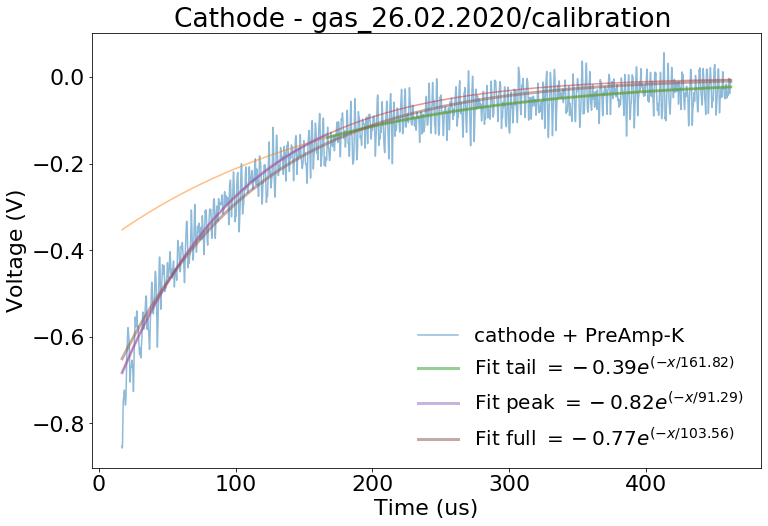

In [18]:
cathodeStart=11000
fitBound=41000

popt, pcov = curve_fit(funcJustExp, timeList[fitBound:],lowCatK[fitBound:],bounds=([-1000,0], [1000,1000]))
popt2, pcov2 = curve_fit(funcJustExp, timeList[cathodeStart:fitBound],lowCatK[cathodeStart:fitBound],bounds=([-1000,0], [1000,1000]))
popt3, pcov3 = curve_fit(funcJustExp, timeList[cathodeStart:],lowCatK[cathodeStart:],bounds=([-1000,0], [1000,1000]))

print(popt)
print(popt2)

fig, ax = plt.subplots()
funcList=funcJustExp(timeList,*popt)
funcList2=funcJustExp(timeList,*popt2)
funcList3=funcJustExp(timeList,*popt3)

tailLabel=r"Fit tail $= "+"{:.2f}".format(popt[0])+"e^{(-x/"+"{:.2f}".format(popt[1])+")}$"
peakLabel=r"Fit peak $= "+"{:.2f}".format(popt2[0])+"e^{(-x/"+"{:.2f}".format(popt2[1])+")}$"
fullLabel=r"Fit full $= "+"{:.2f}".format(popt3[0])+"e^{(-x/"+"{:.2f}".format(popt3[1])+")}$"


ax.plot(timeList[cathodeStart:],lowCatK[cathodeStart:],label="cathode + PreAmp-K",alpha=0.5)
ax.plot(timeList[cathodeStart:],funcList[cathodeStart:],alpha=0.5)
ax.plot(timeList[fitBound:],funcList[fitBound:],label=tailLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[cathodeStart:],funcList2[cathodeStart:],alpha=0.5)
ax.plot(timeList[cathodeStart:fitBound],funcList2[cathodeStart:fitBound],label=peakLabel,alpha=0.5,lineWidth=3)
ax.plot(timeList[cathodeStart:],funcList3[cathodeStart:],label=fullLabel,alpha=0.5,lineWidth=3)


ax.set_xlabel('Time (us)')
ax.set_ylabel('Voltage (V)')
ax.set_title('Cathode - gas_26.02.2020/calibration ')
ax.legend(fontsize=20,loc='lower right')

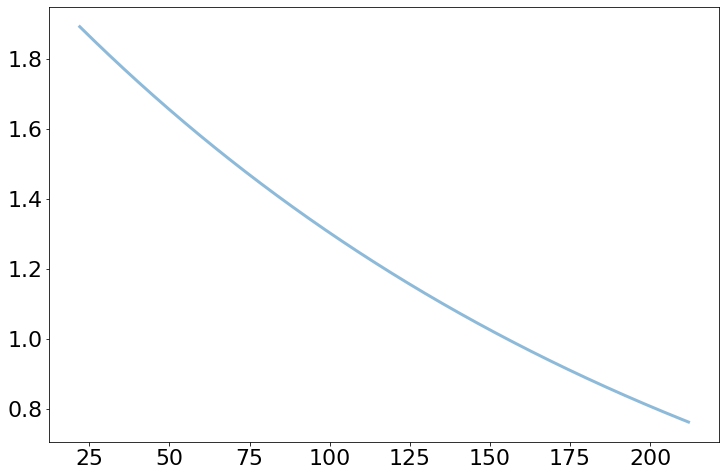

In [19]:
fig, ax = plt.subplots()
ax.plot(timeList[12000:50000],(funcList2/funcList)[12000:50000],label="Func",alpha=0.5,linewidth=3)

(0, 5)

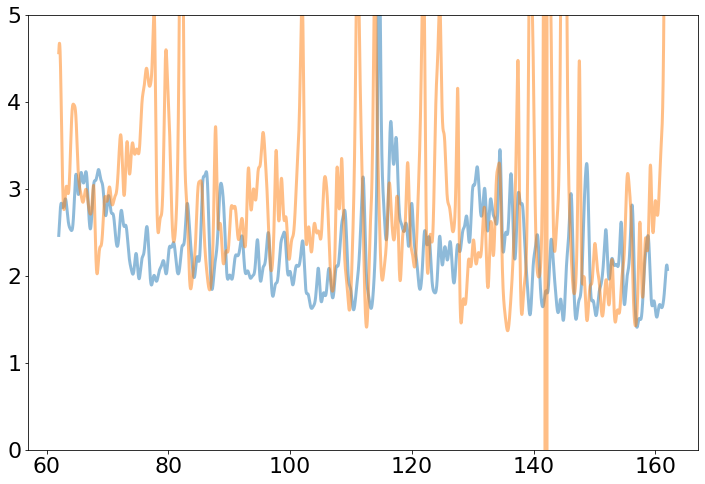

In [21]:
fig, ax = plt.subplots()
numPoints=20000
#ax.plot(timeList[anodeStart:30000],(funcList[anodeStart:30000]/funcList[20000:30000]),label="Func",alpha=0.5,linewidth=3)
ax.plot(timeList[anodeStart:anodeStart+numPoints],(lowAnA[anodeStart:anodeStart+numPoints]/lowAnA[anodeStart+numPoints:anodeStart+2*numPoints]),label="Func",alpha=0.5,linewidth=3)
ax.plot(timeList[anodeStart:anodeStart+numPoints],(lowAnK[anodeStart:anodeStart+numPoints]/lowAnK[anodeStart+numPoints:anodeStart+2*numPoints]),label="Func",alpha=0.5,linewidth=3)
ax.set_ylim([0,5])